124
('17151610374623241.png', array([[ 0.05565617, -0.16045536,  0.98547271,  4.61371654],
       [ 0.99837613,  0.02094918, -0.05297395,  2.12930172],
       [-0.01214489,  0.98682076,  0.16136076,  0.1747108 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), array([4.61371654, 2.12930172, 0.1747108 ]))
['17151610374623241.png', '1715161039081099.png', '1715161040614744.png', '1715161041882042.png', '17151610461164088.png', '1715161047349986.png', '1715161049217597.png', '1715161050418693.png', '1715161052969576.png', '1715161054169632.png', '1715161055469451.png', '1715161056803773.png', '171516105790396.png', '1715161059054329.png', '171516106025535.png', '1715161061589725.png', '1715161064340107.png', '1715161065840829.png', '17151610680915852.png', '1715161069608377.png', '1715161072493106.png', '17151610738597112.png', '1715161075559695.png', '1715161076894308.png', '1715161078445529.png', '17151610804468021.png', '17151610824301429.png', '17151610857466931.png', '

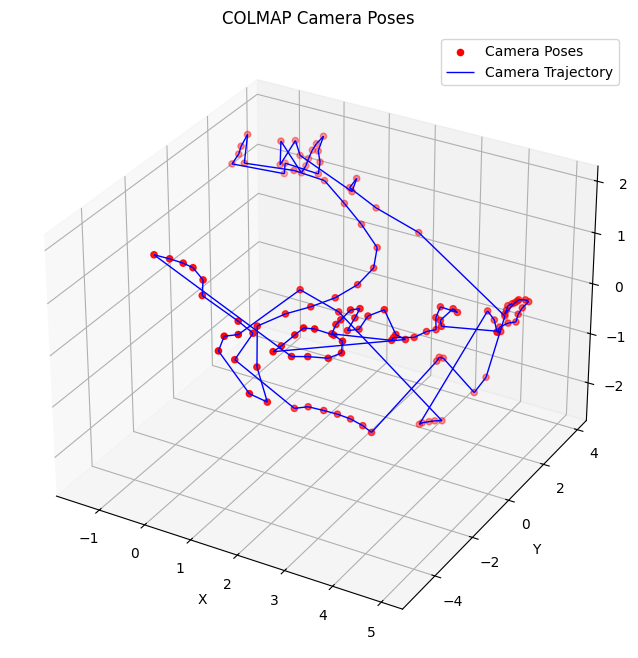

In [57]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

path_colmap = r"D:\3d-reconstruction\datasets\redroom-colmap2nerf2gs\transforms_train.json"

# Load transforms from JSON file
with open(path_colmap, 'r') as f:
    data = json.load(f)

file_path = [frame['file_path'][9:] for frame in data['frames']]

all_poses = []

for frame in data['frames']:
    file = frame['file_path'][9:]
    camera_pose = np.array(frame['transform_matrix'])
    camera_position = camera_pose[:3, 3]
    all_poses.append((file, camera_pose, camera_position))
print(len(all_poses))
print(all_poses[0])

# SORT all data by file name !!!
all_poses.sort(key = lambda x: x[0])

all_file_name    = [f[0] for f in all_poses]
camera_poses     = [f[1] for f in all_poses]
camera_positions = [f[2] for f in all_poses]
print(all_file_name)


# Visualize camera poses
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot camera positions
ax.scatter(*zip(*camera_positions), c='r', marker='o', label='Camera Poses')

# Connect camera positions with lines
lines = []
for i in range(len(camera_positions) - 1):
    lines.append([camera_positions[i], camera_positions[i + 1]])

# Create a line collection
lc = Line3DCollection(lines, colors='b', linewidths=1, label='Camera Trajectory')
ax.add_collection3d(lc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('COLMAP Camera Poses')
ax.legend()

plt.show()

125
('17151610374623241.png', array([[-0.30770531, -0.62083149, -0.72103095, -0.23155414],
       [-0.9179377 , -0.00574439,  0.39668283,  0.51646018],
       [-0.25041506,  0.78392297, -0.56811702,  0.71547621],
       [ 0.        ,  0.        ,  0.        ,  0.99999994]]), array([-0.23155414,  0.51646018,  0.71547621]))
['17151610374623241.png', '1715161039081099.png', '1715161040614744.png', '1715161041882042.png', '17151610461164088.png', '1715161047349986.png', '1715161049217597.png', '1715161050418693.png', '1715161052969576.png', '1715161054169632.png', '1715161055469451.png', '1715161056803773.png', '171516105790396.png', '1715161059054329.png', '171516106025535.png', '1715161061589725.png', '1715161064340107.png', '1715161065840829.png', '17151610680915852.png', '1715161069608377.png', '1715161072493106.png', '17151610738597112.png', '1715161075559695.png', '1715161076894308.png', '1715161078445529.png', '17151610804468021.png', '17151610824301429.png', '17151610857466931.png'

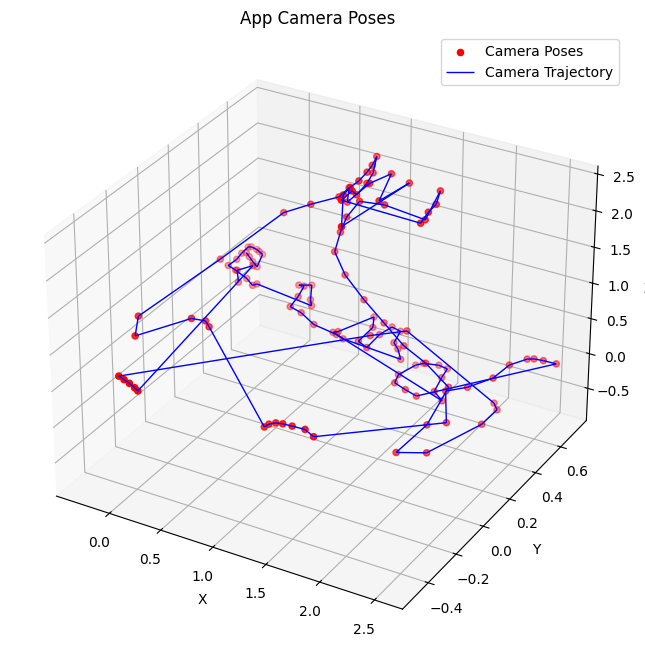

In [58]:
path_app = r"D:\3d-reconstruction\gs-hci\redroom_transform_print_edited.json"


# Load transforms from JSON file
with open(path_app, 'r') as f:
    data = json.load(f)

app_all_poses = []

for frame in data['frames']:
    file = frame['file_path']
    camera_pose = np.array(frame['transform_matrix']).T
    camera_position = camera_pose[:3, 3]
    app_all_poses.append((file, camera_pose, camera_position))
print(len(app_all_poses))
print(app_all_poses[0])

# SORT all data by file name !!!
app_all_poses.sort(key = lambda x: x[0])

app_all_file_name    = [f[0] for f in app_all_poses]
app_camera_poses     = [f[1] for f in app_all_poses]
app_camera_positions = [f[2] for f in app_all_poses]
print(all_file_name)


# Visualize camera poses
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot camera positions
ax.scatter(*zip(*app_camera_positions), c='r', marker='o', label='Camera Poses')

# Connect camera positions with lines
lines = []
for i in range(len(app_camera_positions) - 1):
    lines.append([app_camera_positions[i], app_camera_positions[i + 1]])

# Create a line collection
lc = Line3DCollection(lines, colors='b', linewidths=1, label='Camera Trajectory')
ax.add_collection3d(lc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('App Camera Poses')
ax.legend()

plt.show()

In [59]:
# Find which images is in App but not in Colmap so we can remove it
for file in app_all_file_name:
    if file not in all_file_name:
        index = app_all_file_name.index(file)
        print(index)

del app_all_poses[index]
app_all_file_name    = [f[0] for f in app_all_poses]
app_camera_poses     = [f[1] for f in app_all_poses]
app_camera_positions = [f[2] for f in app_all_poses]


assert all_file_name == app_all_file_name
assert len(app_all_poses) == len(all_poses)

81


In [71]:
# Function to calculate the transformation matrix T
def calculate_transform(T1, T2):
    T1_inv = np.linalg.inv(T1)
    T = np.dot(T2, T1_inv)
    return T


# Find T for converting APP poses (T1) to COLMAP poses (T2)

all_T = []

for idx in range(len(all_poses)):
    assert all_poses[idx][0] == app_all_poses[idx][0] # assert that file name are the same
    this_T = calculate_transform(app_camera_poses[idx], camera_poses[idx])
    if idx == 0:
        all_T = this_T
    else:
        all_T += this_T

all_T = all_T / len(camera_poses)
    

print("Average of Transformation Matrix T :")
print(all_T)

Average of Transformation Matrix T :
[[-0.342288    0.23141059 -0.44054906  2.42548959]
 [-0.47080961 -0.65294247  0.07900484  0.62158264]
 [-0.47559629  0.09420936  0.53287275  0.3726524 ]
 [ 0.          0.          0.          1.00000003]]


In [83]:
T = calculate_transform(app_camera_poses[0], camera_poses[0])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.62806638  0.34075296 -0.69958574  4.79283708]
 [-0.28201572 -0.93758139 -0.20349052  2.69381606]
 [-0.72525846  0.06948863  0.68496097 -0.51918722]
 [ 0.          0.          0.          1.00000006]]


In [84]:
T = calculate_transform(app_camera_poses[10], camera_poses[10])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.43744637  0.17324209 -0.88239885  5.13947268]
 [-0.21524805 -0.97291365 -0.08430443  2.54160878]
 [-0.87310298  0.15305597  0.46288757 -0.59711553]
 [ 0.          0.          0.          1.00000006]]


In [85]:
T = calculate_transform(app_camera_poses[20], camera_poses[20])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.38410136 -0.16718559 -0.90802812  4.32698058]
 [-0.06414866 -0.97626023  0.20688369  1.0080038 ]
 [-0.92105969  0.13771311  0.3642581   0.45911231]
 [ 0.          0.          0.          1.        ]]


In [86]:
T = calculate_transform(app_camera_poses[30], camera_poses[30])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.93724351  0.02025573 -0.34808639  3.86065234]
 [-0.012315   -0.99961127 -0.0250102  -1.32316376]
 [-0.34845767 -0.01915397  0.9371288   1.40682296]
 [ 0.          0.          0.          1.        ]]


In [87]:
T = calculate_transform(app_camera_poses[40], camera_poses[40])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.45865925  0.54937373 -0.69844123  2.3108777 ]
 [-0.46165835 -0.81891048 -0.34096503 -2.69715874]
 [-0.75927806  0.16605449  0.62922385  2.09571344]
 [ 0.          0.          0.          1.        ]]


In [88]:
T = calculate_transform(app_camera_poses[70], camera_poses[70])
print("Transformation Matrix T:")
print(T)

Transformation Matrix T:
[[-0.62913292  0.44820352 -0.63506323  4.3747572 ]
 [-0.36410537 -0.89176481 -0.26866849  2.693202  ]
 [-0.68674511  0.06220175  0.72423192 -2.53875749]
 [ 0.          0.          0.          1.        ]]


In [79]:
transformed_app_poses = [np.dot(pose, all_T) for pose in app_camera_poses]
transformed_app_position = [camera_pose[:3, 3] for camera_pose in transformed_app_poses]

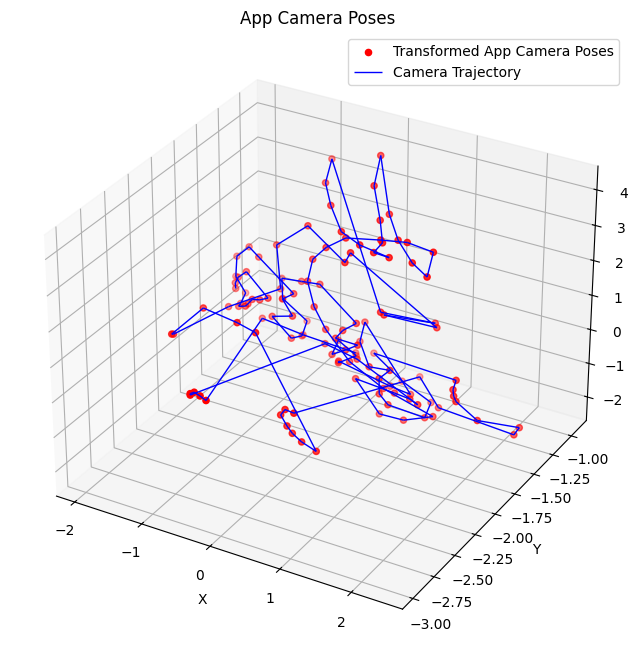

In [81]:
# Visualize camera poses
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot camera positions
ax.scatter(*zip(*transformed_app_position), c='r', marker='o', label='Transformed App Camera Poses')

# Connect camera positions with lines
lines = []
for i in range(len(transformed_app_position) - 1):
    lines.append([transformed_app_position[i], transformed_app_position[i + 1]])

# Create a line collection
lc = Line3DCollection(lines, colors='b', linewidths=1, label='Camera Trajectory')
ax.add_collection3d(lc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('App Camera Poses')
ax.legend()

plt.show()